# Multi Linear Regression

##### Defination and working
Linear Regression is a supervised learning algorithm used when target/dependant variable continues real number.
It establish relationship between target variable y and one or more indepandant variable x using best fit line.
It works on the principal of ordinary least square(OLS) / Mean Square Error (MSE).  In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.



##### hypothesis representation
we will use $x_{i}$ to denote the independent variable and $y_{i}$ to denote dependent variable. A pair of ($x_{i}$, $y_{i}$) is called training example and i is the index of training set. If we have m training example then i=1, 2, 3, ..., m

The goal of supervised learning is to learn a hypothesis function  h , for a given training set that can used to estimate  y  based on  x . So hypothesis fuction represented as

<center><h3>$h_{\theta(x_{i})} = $ ${\theta_{0} +} {\theta_{1}x_{i1}} + {\theta_{2}x_{i2}} + .... + {\theta_{j}x_{ij}} $ </h3></center>

$x_{ij}$ is the ${i^{th}}$ training example of ${j^{th}}$ feature. Above equation is for multi linear regression.
<center>${\hat{y}} = $ ${\beta_{0}} +  {\beta_{1}}{x_{1}}$</center>

You can also write like above equation but this is only for single linear regression

* ${\beta_{0}}$ = y intercept
* ${\beta_{1}}$ = slope

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

base svc running
svc running


In [2]:
#import dataset
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* $x_{1}$ = age
* $x_{2}$ = sex
* $x_{3}$ = bmi
* $x_{4}$ = children
* $x_{5}$ = smoker
* $x_{6}$ = region

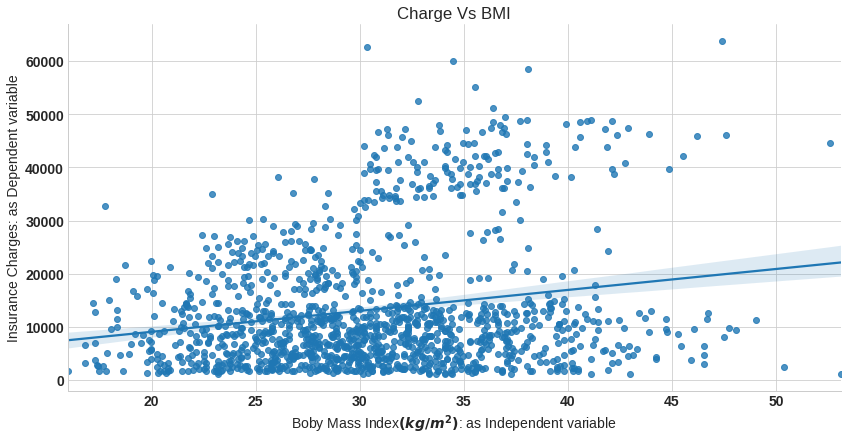

In [3]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');


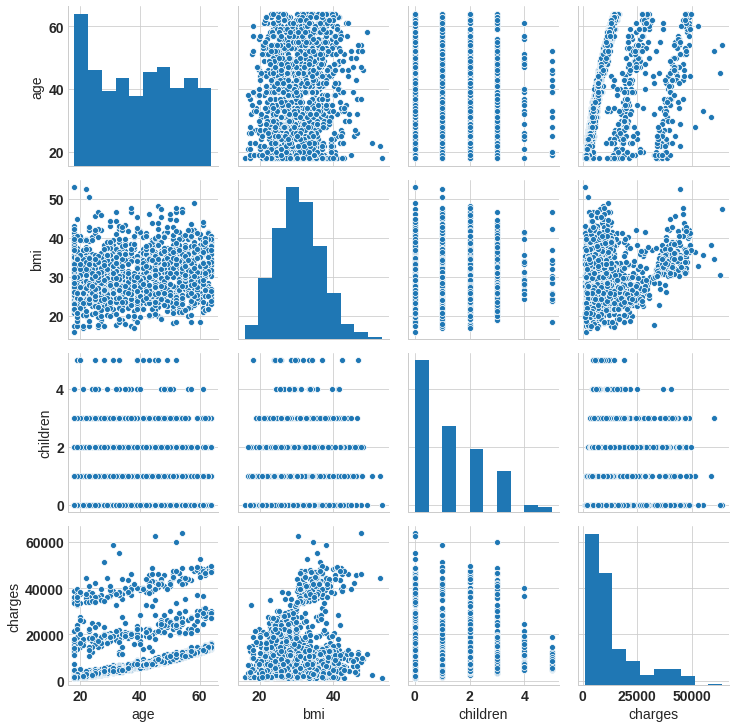

In [4]:
sns.pairplot(df)

<AxesSubplot:>

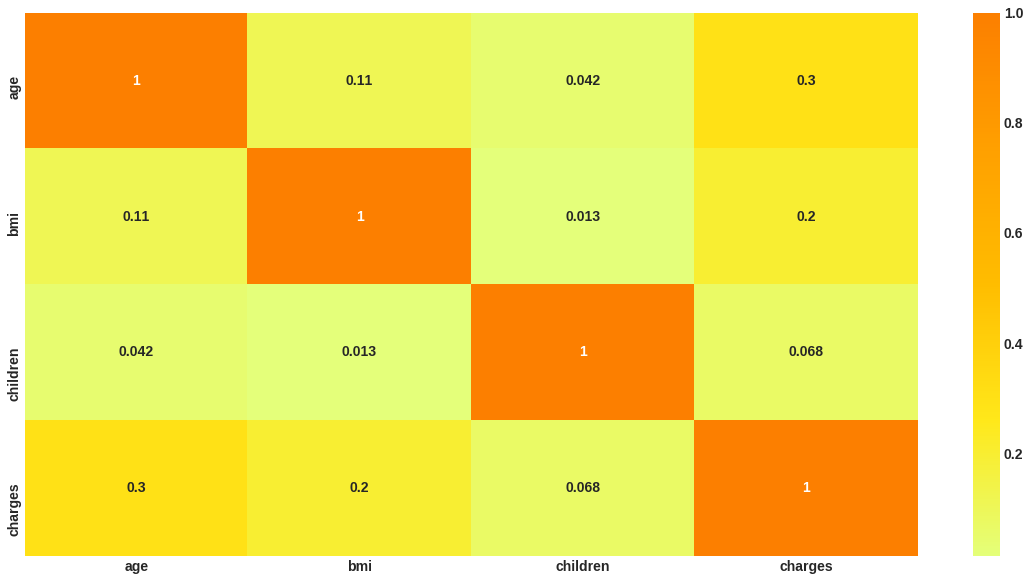

In [5]:
#correclation plot
corr = df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)

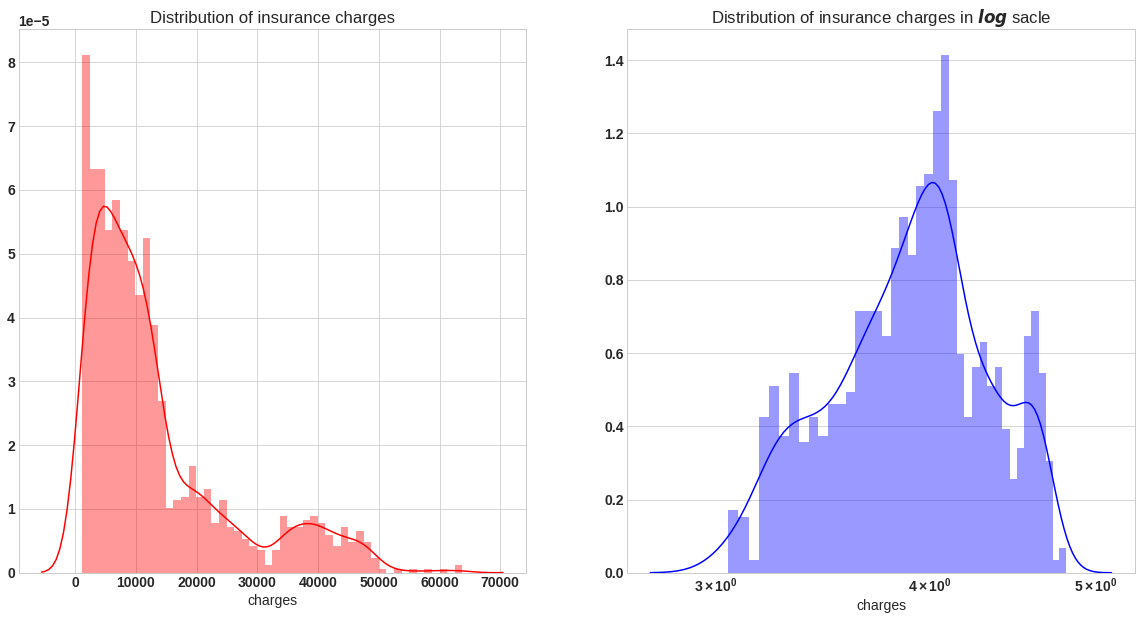

In [6]:
f= plt.figure(figsize=(20,10))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

### Data Preprocessing

In [7]:
#checking is null value is exists
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Encoding

Machine learning algoriths not work with categorical data we have to change data into numbers so our algorithm can understand it.
1. Label Encoding
2. One Hot Encoding
3. Dummy Variables Trap

<b>Label encoding</b> refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A <b>One hot encoding</b> is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The <b>Dummy variable trap</b> is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

In [8]:
categorical_columns = ["sex", "children", "smoker", "region"]
df_encode = pd.get_dummies(
                            data=df, 
                            prefix="OHE",
                            prefix_sep="_",
                            columns=categorical_columns,
                            drop_first=True,
                            dtype="int8"
                        )

In [9]:
#Splitting the dataset into train and test
X = df_encode.drop('charges', axis=1) #independent variables
y = df_encode['charges'] #dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
621,37,34.100,1,0,0,0,1,0,1,0,0,1
194,18,34.430,1,0,0,0,0,0,0,0,1,0
240,23,36.670,0,0,1,0,0,0,1,0,0,0
1168,32,35.200,1,0,1,0,0,0,0,0,0,1
1192,58,32.395,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,27,26.030,1,0,0,0,0,0,0,0,0,0
835,42,35.970,1,0,1,0,0,0,0,0,1,0
1216,40,25.080,1,0,0,0,0,0,0,0,1,0
559,19,35.530,1,0,0,0,0,0,0,1,0,0


In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

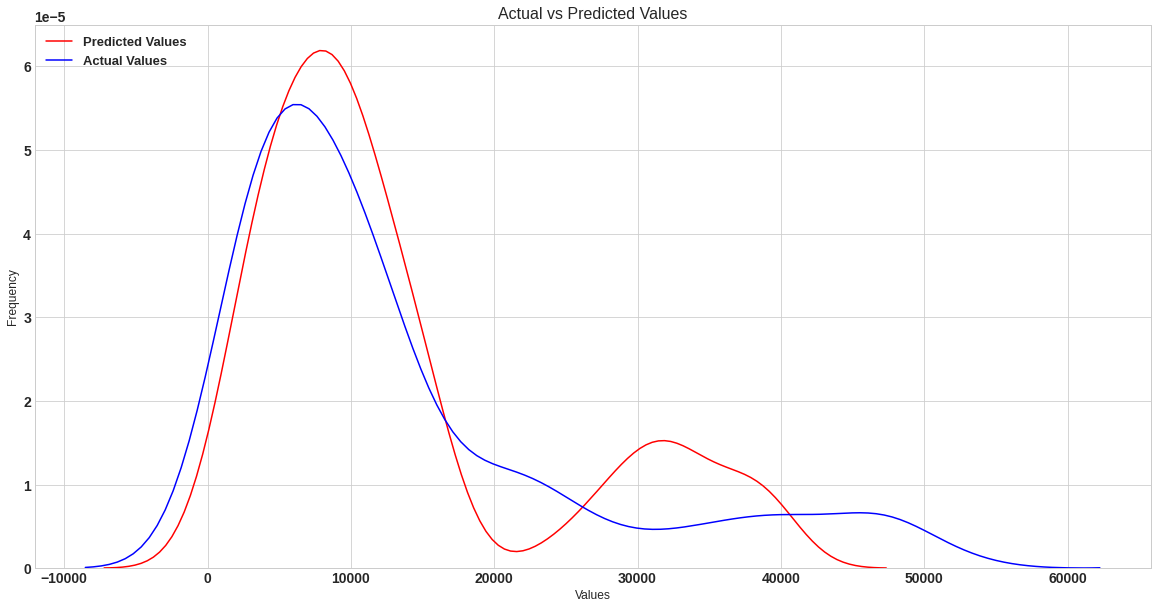

In [11]:
y_pred = regressor.predict(X_test)
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [12]:
print(regressor.score(X_test, y_test))

0.7983507767817666


In [13]:
print('r2score', r2_score(y_test, y_pred))

r2score 0.7983507767817666


In [14]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# regressor.fit(X_train, y_train)
# regressor.score(X_test, y_test)

In [15]:
parameter = ['theta_'+str(i) for i in range(X_train.shape[1]+1)]
columns = ['intersect']+list(X.columns.values)
skTheta = [regressor.intercept_]+list(regressor.coef_)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns, 'SKTheta':skTheta})
parameter_df

,Parameter,Columns,SKTheta
0,theta_0,intersect,-11838.156217
1,theta_1,age,253.729345
2,theta_2,bmi,333.229625
3,theta_3,OHE_male,-11.247968
4,theta_4,OHE_1,487.317674
5,theta_5,OHE_2,1735.068271
6,theta_6,OHE_3,727.254205
7,theta_7,OHE_4,3233.213700
8,theta_8,OHE_5,681.588757
9,theta_9,OHE_yes,23571.421969


### Model Validation

In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

1. Lineaer Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scotter plotting Actual Value vs Predicted Value

2. The Residual plot should be normally distributed

3. The mean of residual error should be 0 or close to 0 as much as possible

Text(0.5, 1.0, 'Check for residual normality and mean')

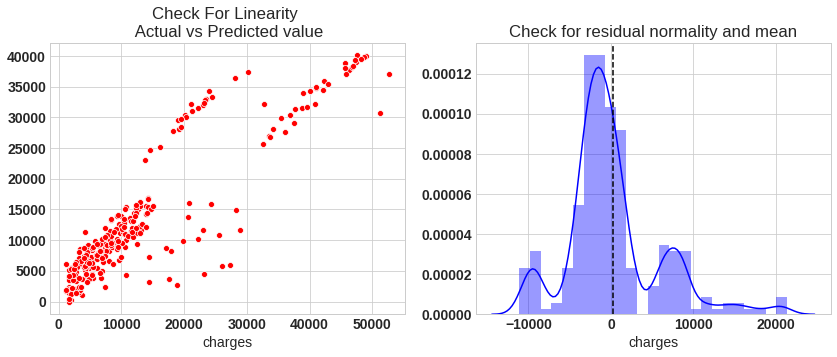

In [30]:
#Check For Linearity
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
sns.scatterplot(y_test, y_pred, ax=ax, color="r")
ax.set_title('Check For Linearity \n Actual vs Predicted value')



#f = plt.figure(figsize=(14, 5))

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred), ax=ax, color="b")
ax.axvline((y_test-y_pred).mean(), color="k", linestyle='--')
ax.set_title("Check for residual normality and mean")
